# Data Analysis Assignment 3

## Adam Fair

### Prerequisites

In [1]:
# Load packages and data needed for this assignment: Refer to the prerequisites section of the assignment
library(tidyverse)
require(nycflights13)
data(diamonds)
load("india04.Rdata")



Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: nycflights13
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'nycflights13'"

Some questions require code answers, some formatted text answers, and some both types of answers for your assignment submission. This templates guides you through that.

## Section 1

### 1. (3 pts) Filter out the Unknown category from the edattain variable in the india04 dataframe. Save the resulting dataframe as india04_new.

In [2]:
# Type code that answers this question here
india04_new <- india04 %>% 
  filter(edattain != "Unknown")
    


### 2. (7 pts) Show one example of how you could explore the distribution of each of the age, edattain, and incwage variables in india04_new. What do you learn?

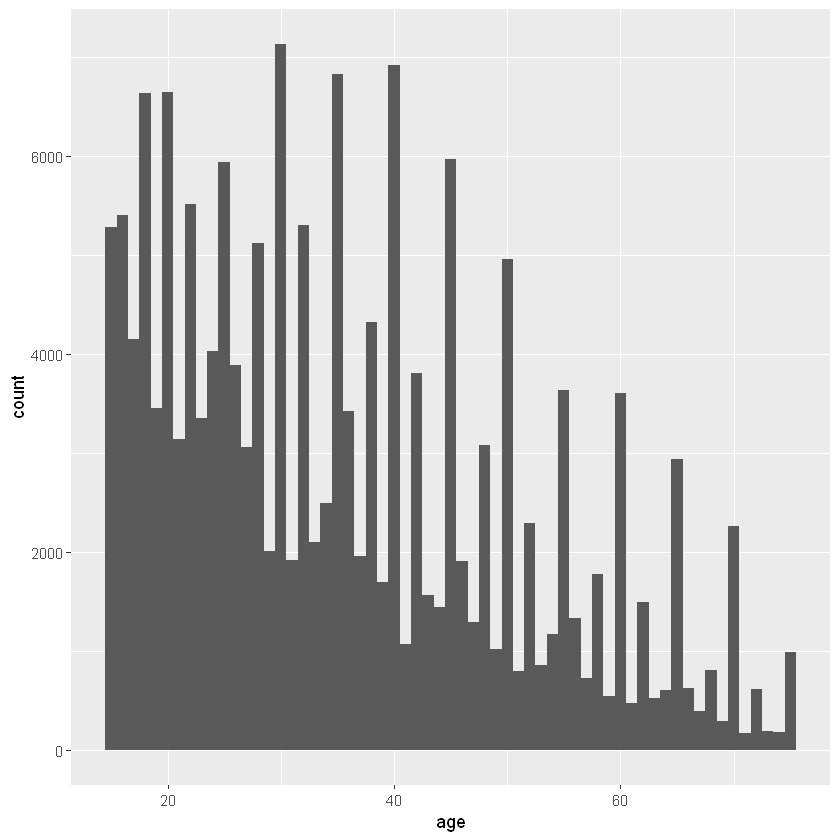

Warning message:
"Removed 131198 rows containing non-finite values (stat_bin)."

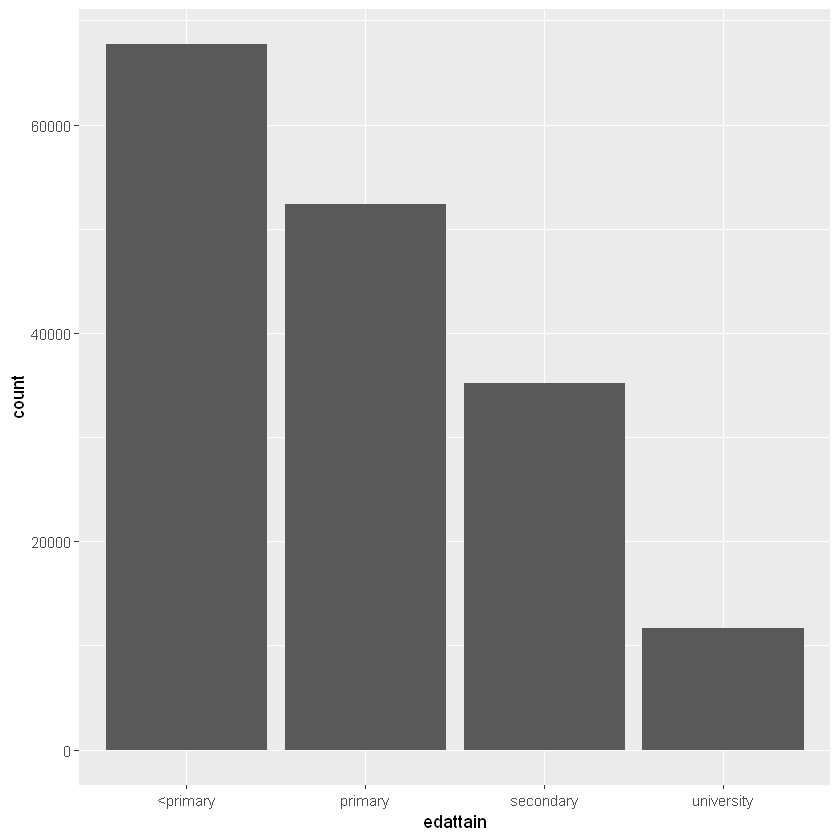

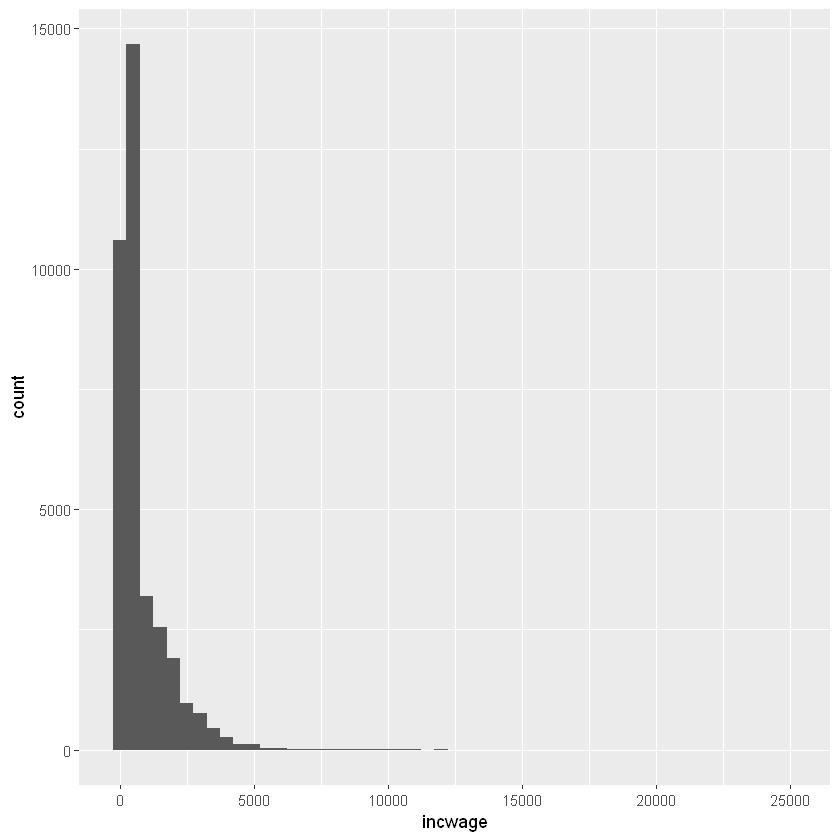

In [3]:
# Type code that answers this question here
# The age variable is continous therefore we use a histogram.
ggplot(data = india04_new, mapping = aes(x = age)) + 
  geom_histogram(binwidth = 1)

# The edattain variable is catergorical therefore we use a bar chart.
ggplot(data = india04_new) +
  geom_bar(mapping = aes(x = edattain))

# The incwage variable is continous therefore we use a histogram.
ggplot(data = india04_new) +
  geom_histogram(mapping = aes(x = incwage), binwidth = 500)

I learned that different ways of plotting the variables are more effective to explore the distributioon depending on the the type of variable. Above we see that a histogram is most effective to examine the distribution of continuous variables and a bar graph is most effective to examine the distribution of a categorical variable.

### 3. (5 pts) Compare and contrast coord_cartesian() vs xlim() when zooming in on a histogram.

`coord_cartesian()` makes it easy to see outliers (unusual) values on the histogram. Setting limits on the coordinate system will zoom the plot and will not change the underlying data.

`xlim()` sets a limit for the x axis. Setting limits on the scale using `xlim()` will change the underlying data unlike using `coord_cartesian()`.

Additionally, you can use `xlim()` and `ylim()` inside the `coord_cartesian()` function in a way that does not exclude the data outside their limits.

### 4. (5 pts) What does na.rm = TRUE do in max() and mean() functions? Test each command on the variable incwage in india04_new.

In [4]:
# Type code that answers this question here
incwage_1 = india04_new$incwage
max(incwage_1)
mean(incwage_1)
#Using na.rm = TRUE
max(incwage_1, na.rm = TRUE) 
mean(incwage_1, na.rm = TRUE)

[1] NA

[1] NA

[1] 25000

[1] 808.3772

The `na.rm = TRUE`when used in `max()` and mean `()` functions removes NA values from the respective function's calculation. When `na.rm` is set to `FALSE` it included the NA values in the calculation.

### 5. (5 pts) What is the highest income level observed in the data?

According to the `max(incwage_1, na.rm = TRUE)` function from the Exercise above the highest income level is `25000`.

### 6. (5 pts) How many individuals earn exactly 200 rupees? How many earn 201? What are your thoughts on this difference?

In [5]:
# Type code that answers this question here

india04_new %>% 
  count(incwage == 200)

india04_new %>% 
  count(incwage == 201)

incwage == 200,n
FALSE,34664
TRUE,1132
NA,131198


incwage == 201,n
FALSE,35794
TRUE,2
NA,131198


According to the two funtions above there are `1132` individuals that earn exactly `200` rupees and `2` individuals that earn exactly 201 rupees.

My thoughts on this difference are that it is surprising to see such a large decrease (-113100%) in individuals when the earnings increase by a single rupee.

## Section 2 

### 1. (5 pts) Use the ifelse() function to create a new variable called incwage_adj in a new dataframe called india04_new2, where all the income values that are not between the 1st and the 99th percentile are substituted with missing values (NA).

In [6]:
# Type code that answers this question here

india04_new2 <- india04 %>%
    mutate(incwage_adj = ifelse(between(incwage, quantile(incwage, 0.01, na.rm = TRUE), quantile(incwage, 0.99, na.rm = TRUE)), incwage, NA))

### 2. (5 pts) Using india04_new2, create a new variable called log_incwage_adj, that is the natural logarithm of incwage_adj. Save the resulting dataframe as a new object india04_new3.

In [7]:
# Type code that answers this question here

india04_new3 <- india04_new2 %>%
    mutate(log_incwage_adj = log(incwage_adj))


### 3. (5 pts) Plot a histogram of log_incwage_adj from india04_new3 constructed above. How does it look different from the same histogram constructed using the natural log transformation of the incwage variable from the india04_new dataframe?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 131843 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 131198 rows containing non-finite values (stat_bin)."

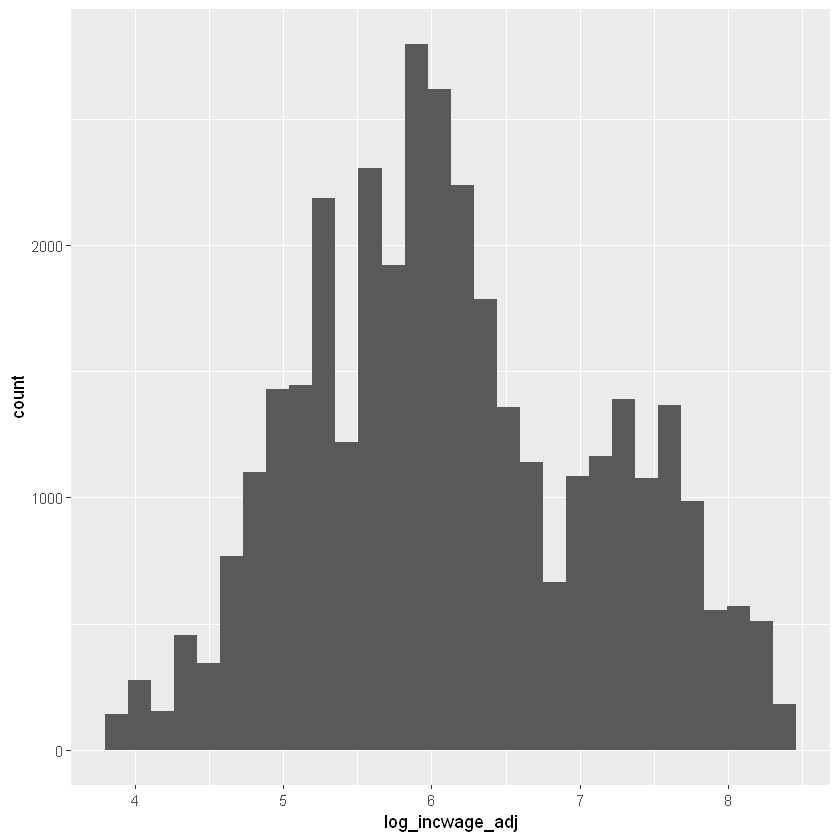

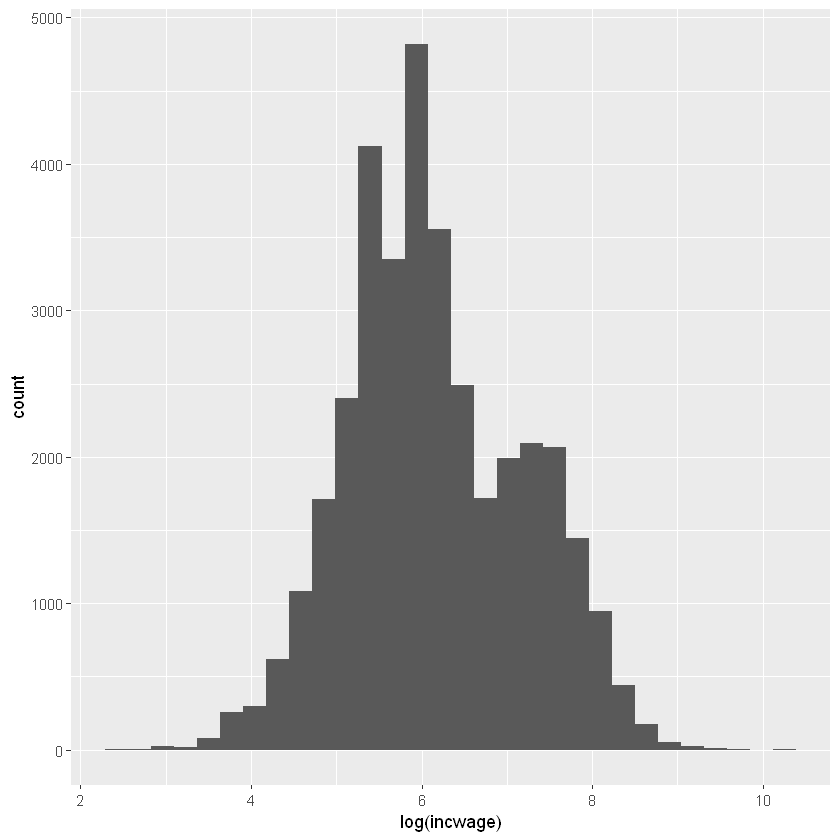

In [8]:
# Type code that answers this question here
#Histogram of log_incwage_adj from india04_new3 constructed above.
ggplot(india04_new3) + 
  geom_histogram(mapping = aes(x = log_incwage_adj))
#The same histogram constructed using the natural log transformation of the incwage variable from the india04_new dataframe
ggplot(india04_new) + 
  geom_histogram(mapping = aes(x = log(incwage)))

The histogram of log_incwage_adj from india04_new3 constructed above appears to have datapoints more dispersed throughout the plot resulting in thicker tails.

The same histogram constructed using the natural log transformation of the incwage variable from the india04_new dataframe appears to have many datapoints centered in the middle of the plot resulting in thinner tails.

## Section 3

### 1. (10 pts) Using two different plot types among the ones seen above, explore the relationship between educational attainment, log income and sex.

Warning message:
"Removed 131843 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 131843 rows containing non-finite values (stat_bin)."

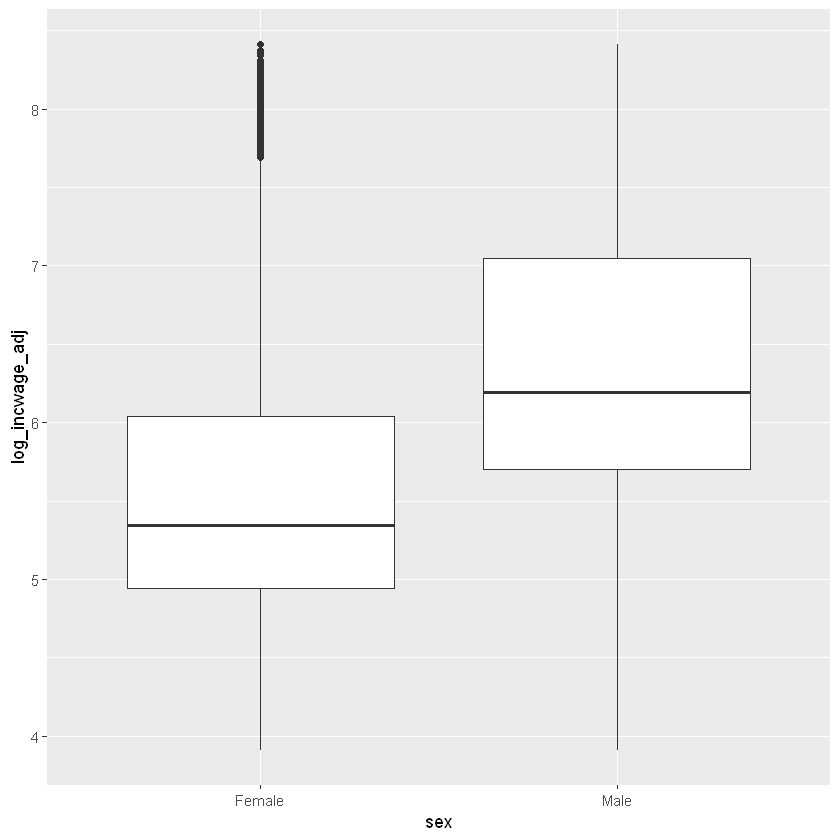

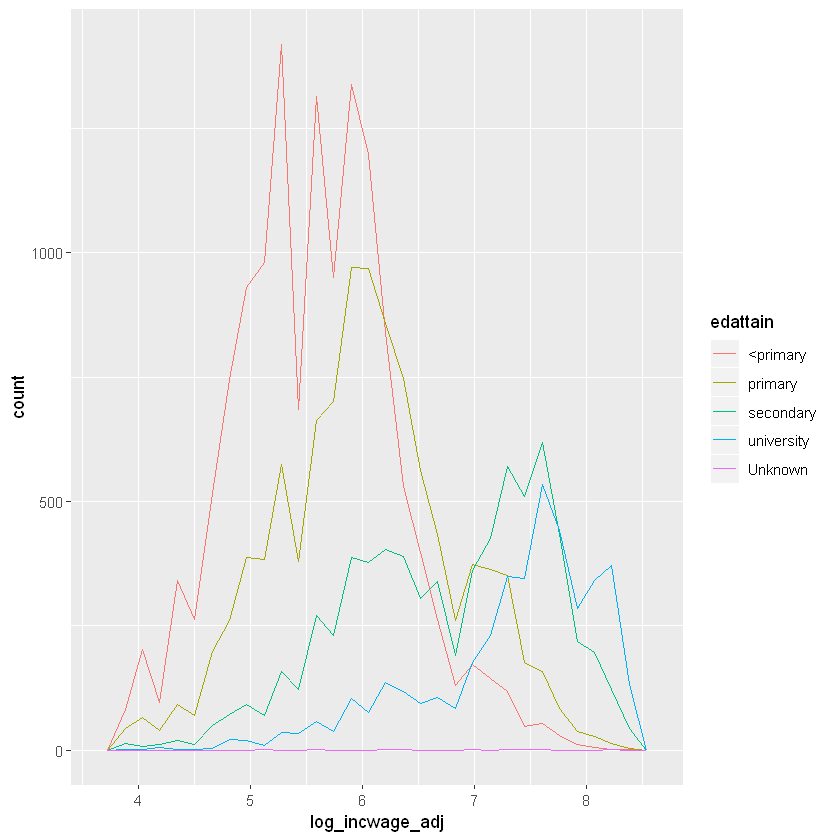

In [9]:
# Type code that answers this question here

ggplot(data = india04_new3, mapping = aes(x = sex, y = log_incwage_adj)) +
  geom_boxplot()

ggplot(data = india04_new3, mapping = aes(x = log_incwage_adj)) + 
  geom_freqpoly(mapping = aes(colour = edattain))

### 2. (5 pts) Summarize your findings on the differences in the distribution of log income by sex and educational level.

On the relationship of log income and sex:

We see that the mean of Male's log income is signifigantly higher than that of the females. Additionally, we see that that the top of every quartile for the male's is higher than the same quartile of the females. The high income females that match with the male's 4th quartile appear to be extreme outliers. The male's mean log income is beyond the maximum of the female's second quartile. It is notable that male's can be expected to make signifiantly more than females.

Of the relationship of log income and educational level:
The majority of the individuals are both in the bottom half of educationa attained and log income. As the level of education increases you can expect the concentration of datapoints to move to that of a higher income.

On the differences:

Males and those with "<primary" and "primary" educations appear that they would have the most normal distributions.

Females and those with University educations appear to have the largest differences in the concentration of log incomes.

Males and those with "primary" educations also have a signifigantly large difference in the concentration of log incomes.

### 3. (5 pts) It can be sometimes be difficult to interpret categorical variables like sex and urban. Dummy variables are often used to keep track of categorical variable using numbers. A dummy variable with a value of 1 is typically interpreted as being “TRUE”, while a value of 0 is interpreted as “FALSE”. Add two new variables to the india04_new3 dataframe and call the resulting dataframe india04_new4:
#### A new dummy variable called female_dummy that has value of 1 if an individual’s sex is categorized as “Female”.
#### A new dummy variable called urban_dummy that has value of 1 if an individual’s urban status is categorized as “Urban”.

In [10]:
# Type code that answers this question here

india04_new4 <- india04_new3 %>%
    mutate(female_dummy = ifelse(sex == "Female", 1, 0))

india04_new4 <- india04_new4 %>%
    mutate(urban_dummy = ifelse(urban == "Urban", 1, 0))


### 4. (5 pts) Create a new object called india04_summary, by selecting the log adjusted income variable, the age variable and the two dummy variables created in the previous question from the india04_new4 dataframe. Notice that these are all numerical variables.

In [11]:
# Type code that answers this question here

india_04_summary <- india04_new4 %>%
    select(age, female_dummy, urban_dummy,)

### 5. (15 pts) Install the package stargazer and import this package into your library (remember that install statements should not be in your final script). Use this package to save a summary statistics table of india04_summary. Some tips:

#### Helpful instructions on how to use this package can be found here.
#### Stargazer normally requires dataframes as an input; you can use the command as.data.frame() to make sure your input data has been read correctly.
#### Use the title option to give your table an appropriate name.
#### Use the type = html option to save the output file in your project folder. Open the html file (using a web browser like Chrome or Safari) to make sure this worked. Submit the html file with the rest of the files in your submission folder.

In [12]:
# Type code that answers this question here
library(stargazer)
stargazer(as.data.frame(india_04_summary), type = "html", title = "India 04 Summary Statistics", out= "india_04_summary_statistics_table.htm")



Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




<table style="text-align:center"><caption><strong>India 04 Summary Statistics</strong></caption>
<tr><td colspan="8" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Statistic</td><td>N</td><td>Mean</td><td>St. Dev.</td><td>Min</td><td>Pctl(25)</td><td>Pctl(75)</td><td>Max</td></tr>
<tr><td colspan="8" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">age</td><td>167,079</td><td>35.683</td><td>15.080</td><td>15</td><td>23</td><td>45</td><td>75</td></tr>
<tr><td style="text-align:left">female_dummy</td><td>167,079</td><td>0.494</td><td>0.500</td><td>0</td><td>0</td><td>1</td><td>1</td></tr>
<tr><td style="text-align:left">urban_dummy</td><td>167,079</td><td>0.353</td><td>0.478</td><td>0</td><td>0</td><td>1</td><td>1</td></tr>
<tr><td colspan="8" style="border-bottom: 1px solid black"></td></tr></table>


## Section 4

### 1. (5 pts) Use group_by to display the proportion of each educational attainment. Use stargazer to report your results in a table which your code should produce and save as html and include in your submission folder. (Hint: You can use the options summary = FALSE and rownames = FALSE together with the options from Section 3 Exercise 5).

In [13]:
# Type code that answers this question here

india04_new4 %>%
mutate(tot = sum(perwt, na.rm = T)) %>%
group_by(edattain) %>%
summarise(share = sum(perwt, na.rm = T)/first(tot)) %>%
stargazer(summary = FALSE, rownames = FALSE, type = 'html', title = "India04 Summary Education Attained Proportions", out = "india_04_education_attained_proportions.htm")



<table style="text-align:center"><caption><strong>India04 Summary Education Attained Proportions</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">edattain</td><td>share</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">< primary</td><td>0.477280435351505</td></tr>
<tr><td style="text-align:left">primary</td><td>0.290132348006461</td></tr>
<tr><td style="text-align:left">secondary</td><td>0.175167708145889</td></tr>
<tr><td style="text-align:left">university</td><td>0.0571204738086417</td></tr>
<tr><td style="text-align:left">Unknown</td><td>0.000299034687504021</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr></table>


### 2. (10 pts) Use group_by to display the proportion of each education attainment within sex. Use stargazer to report your results in a table which you will also save as html and include in your submission folder.

In [14]:
# Type code that answers this question here

india04_new4 %>%
group_by(sex, edattain) %>%
summarise(share = sum(perwt, na.rm = TRUE)) %>%
mutate(share = share/sum(share)) %>%
stargazer(summary = FALSE, rownames = FALSE, type = 'html', title = "India04 Summary Education Attained Proportions Within Sex", out = "india_04_education_attained_proportions_within_Sex.htm")


<table style="text-align:center"><caption><strong>India04 Summary Education Attained Proportions Within Sex</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">sex</td><td>edattain</td><td>share</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Female</td><td>< primary</td><td>0.585453441179725</td></tr>
<tr><td style="text-align:left">Female</td><td>primary</td><td>0.244501824377807</td></tr>
<tr><td style="text-align:left">Female</td><td>secondary</td><td>0.130086792559362</td></tr>
<tr><td style="text-align:left">Female</td><td>university</td><td>0.0396364807146811</td></tr>
<tr><td style="text-align:left">Female</td><td>Unknown</td><td>0.00032146116842432</td></tr>
<tr><td style="text-align:left">Male</td><td>< primary</td><td>0.371992051824192</td></tr>
<tr><td style="text-align:left">Male</td><td>primary</td><td>0.33454605395446</td></tr>
<tr><td style

## Section 5

### 1. (5 pts) Combine two of the techniques you’ve learned to visualise the combined distribution of log income, age, and sex.

Warning message:
"Removed 122 rows containing missing values (geom_tile)."Warning message:
"Removed 122 rows containing missing values (geom_point)."

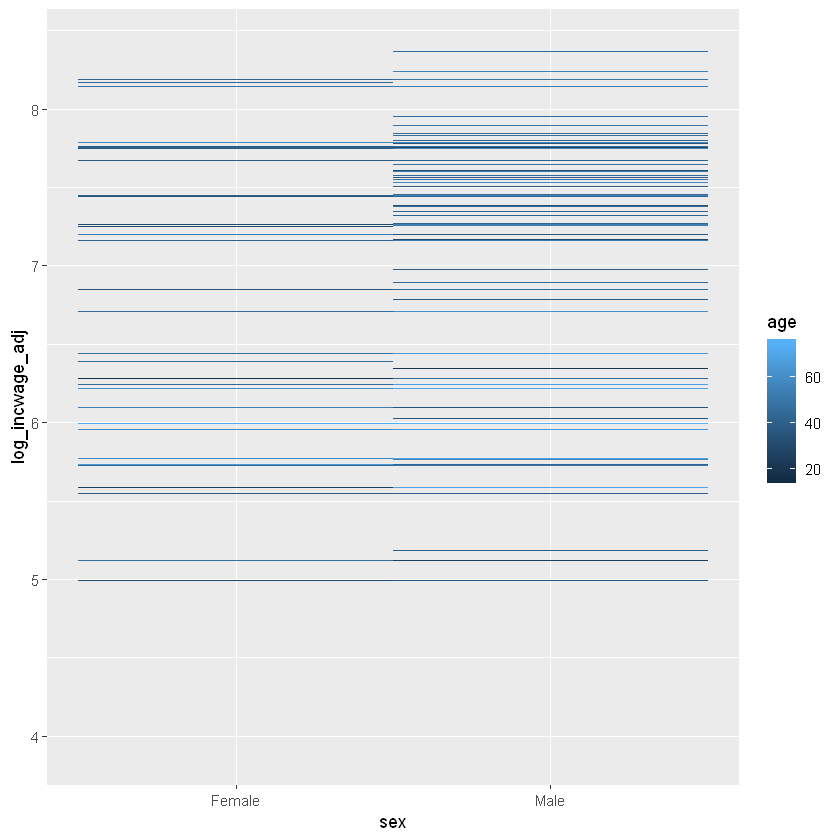

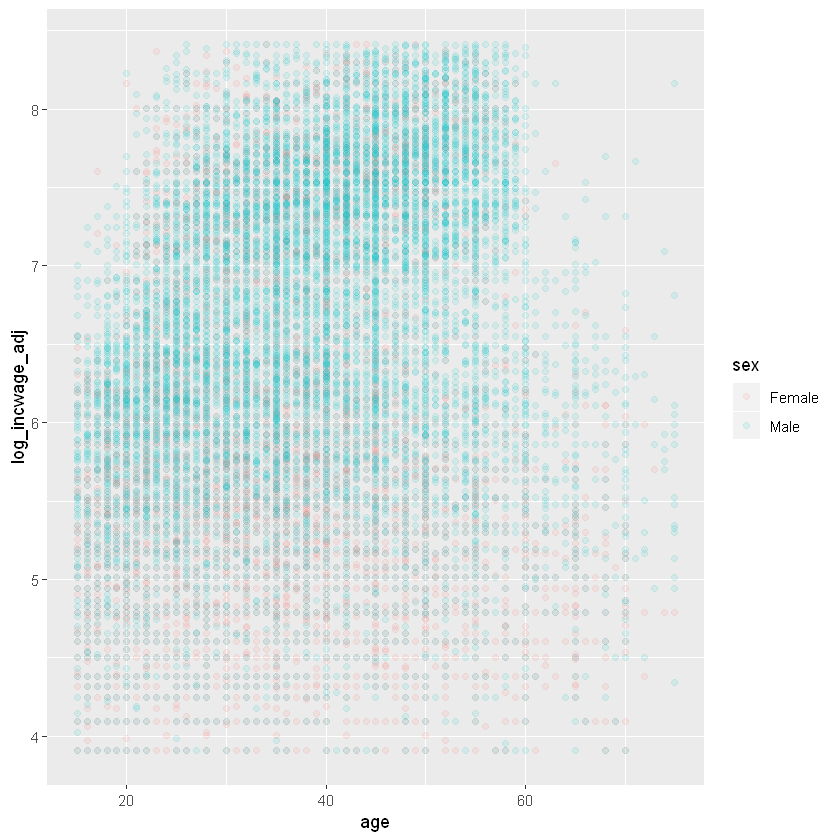

In [15]:
# Type code that answers this question here

#First Technique
india04_count <- india04_new4 %>% 
  count(sex, log_incwage_adj, age)

india04_count %>%
  ggplot(mapping = aes(x = sex, y = log_incwage_adj)) +
    geom_tile(mapping = aes(fill = age))

#Second Technique
india04_count %>%
ggplot() +
  geom_point(mapping = aes(y = log_incwage_adj, x = age, color = sex), alpha = 1 / 10)
    

#+
 # geom_freqpoly(mapping = aes(colour = sex))